# Assignment: Part I
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

### Meaning of variables used:
- child_mort = Death of children under 5 years of age per 1000 live births
- exports = Exports of goods and services. Given as %age of the Total GDP
- health = Total health spending as %age of Total GDP
- imports = Imports of goods and services. Given as %age of the Total GDP
- Income = Net income per person
- Inflation = The measurement of the annual growth rate of the Total GDP
- life_expec = The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer = The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp = The GDP per capita. Calculated as the Total GDP divided by the total population.

### Steps involved are:
1. Read and visualize the data
2. Clean the data
3. Preparing the data
4. Principal Component Analysis
5. Hopkins Statistics
6. K-Means clustering
7. Analysing the k-means cluster
8. Hierarchical Clustering
9. Analysing the hierarchical clusters

# Step 1: Read and visualize the data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
df = pd.read_csv('C:/Users/36442/Desktop/PERSONAL/upgrad/case study clustering and pca/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# shape of the dataset
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Step 2: Clean the data

### checking outliers

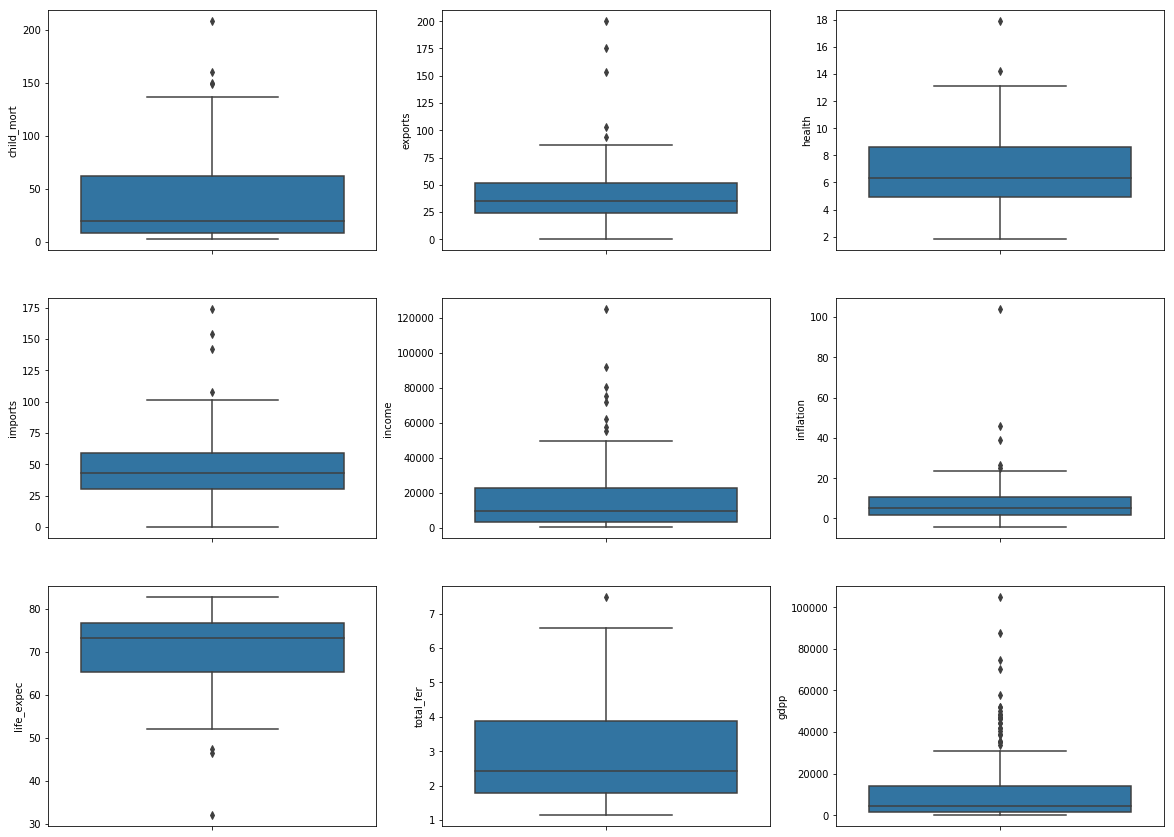

In [6]:
# checking outliers
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(y = 'child_mort', data = df)
plt.subplot(3,3,2)
sns.boxplot(y = 'exports', data = df)
plt.subplot(3,3,3)
sns.boxplot(y = 'health', data = df)
plt.subplot(3,3,4)
sns.boxplot(y = 'imports', data = df)
plt.subplot(3,3,5)
sns.boxplot(y = 'income', data = df)
plt.subplot(3,3,6)
sns.boxplot(y = 'inflation', data = df)
plt.subplot(3,3,7)
sns.boxplot(y = 'life_expec', data = df)
plt.subplot(3,3,8)
sns.boxplot(y = 'total_fer', data = df)
plt.subplot(3,3,9)
sns.boxplot(y = 'gdpp', data = df)
plt.show()

the dataset contain few outliers which can be analysed and treated after Principal Component Analysis

In [7]:
# correlation between the variables
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


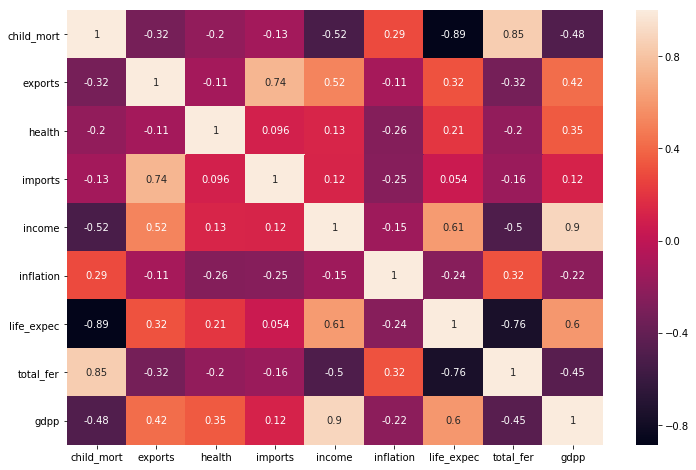

In [8]:
# heatmap to show correlation among the variables 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

- child mortality is highly negatively correlated to life_expec
- child mortality is positively correlated to total fertility
- income is negatively correlated to child motality and is highly positively correlated to gdpp 

### checking if any null value  is present 

In [9]:
# checking if any null value is present
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
# copying the original dataset to df1 
df1 = df.copy()
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### formating the variables for better understanding of the data set

In [11]:
# changing the format of the variables 
df['exports'] = df['exports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100

In [12]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Step 3: Preparing the data 

In [13]:
# dropping the country column
df = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### standardization of the columns to bring it to the normal and equal scale

In [14]:
# standardization 
df=(df-df.mean())/df.std()
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692


# Step 4: Principal Component Analysis

In [15]:
# importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [16]:
#Doing the PCA on the data
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [17]:
#List of PCA components.
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [18]:
colnames = list(df.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.316392,0.476267,child_mort
1,0.342887,0.397311,exports
2,0.358535,0.155053,health
3,0.344865,0.370781,imports
4,0.380041,0.128384,income


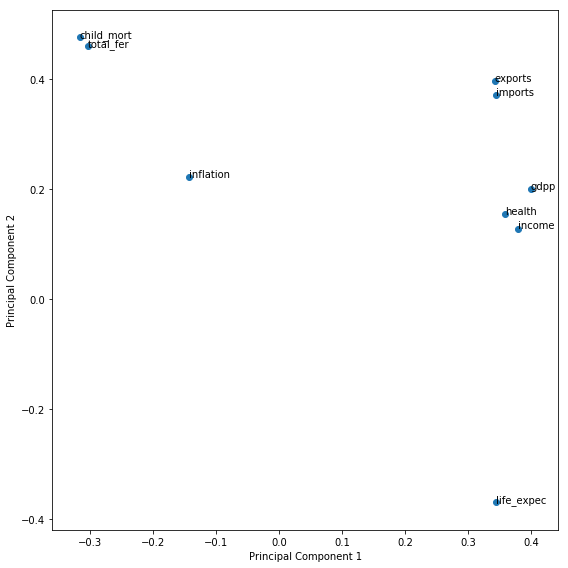

In [19]:
# plotting the principal components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [20]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

### scree plot

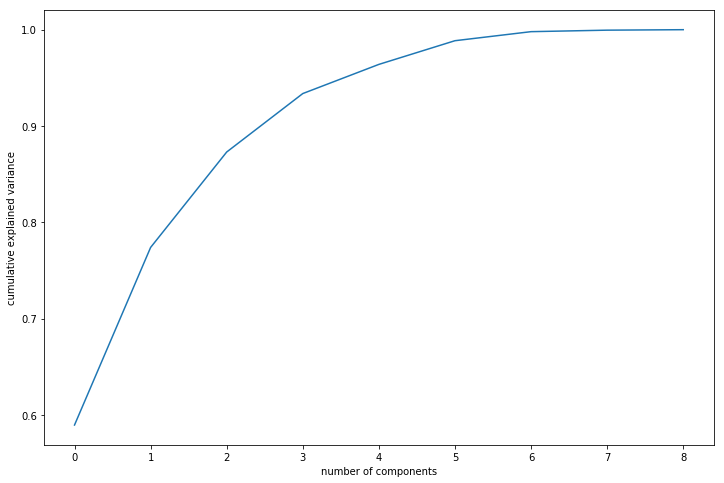

In [21]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

more than 95% of the information is being explained by 5 components 

In [22]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [23]:
df_pca = pca_final.fit_transform(df)
df_pca.shape

(167, 5)

In [24]:
df_pca

array([[-2.62843272e+00,  1.46784526e+00, -5.46686325e-01,
         2.37587577e-01,  6.08200096e-02],
       [-2.37116029e-02, -1.43123092e+00, -1.54238103e-02,
        -4.26994158e-01, -1.53842456e-01],
       [-4.57851260e-01, -6.77666611e-01,  9.53668632e-01,
        -1.92951010e-01, -9.18512570e-02],
       [-2.71530546e+00,  2.16844480e+00,  5.95605553e-01,
         4.16442605e-01,  5.65244483e-02],
       [ 6.47157157e-01, -1.02332668e+00, -2.57869614e-01,
        -2.76052181e-01,  7.68561708e-02],
       [ 3.58423388e-02, -6.83635828e-01,  1.46401576e+00,
         4.58941487e-02, -9.29132118e-02],
       [-3.33454247e-01, -1.27478261e+00,  1.90233348e-01,
        -4.75588250e-01, -2.52796847e-01],
       [ 3.17449153e+00, -2.38689439e-01, -1.31297554e-01,
         1.66935873e+00,  8.71056524e-02],
       [ 3.80629415e+00,  2.61662045e-01, -2.57779015e-01,
         1.02158506e+00, -2.98712732e-01],
       [-4.66601384e-01, -4.92467125e-01,  6.09680239e-01,
        -2.75462452e-01

In [25]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [26]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1]})
pcs_df2.head()

,PC1,PC2
0,-2.628433,1.467845
1,-0.023712,-1.431231
2,-0.457851,-0.677667
3,-2.715305,2.168445
4,0.647157,-1.023327


In [27]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pc)

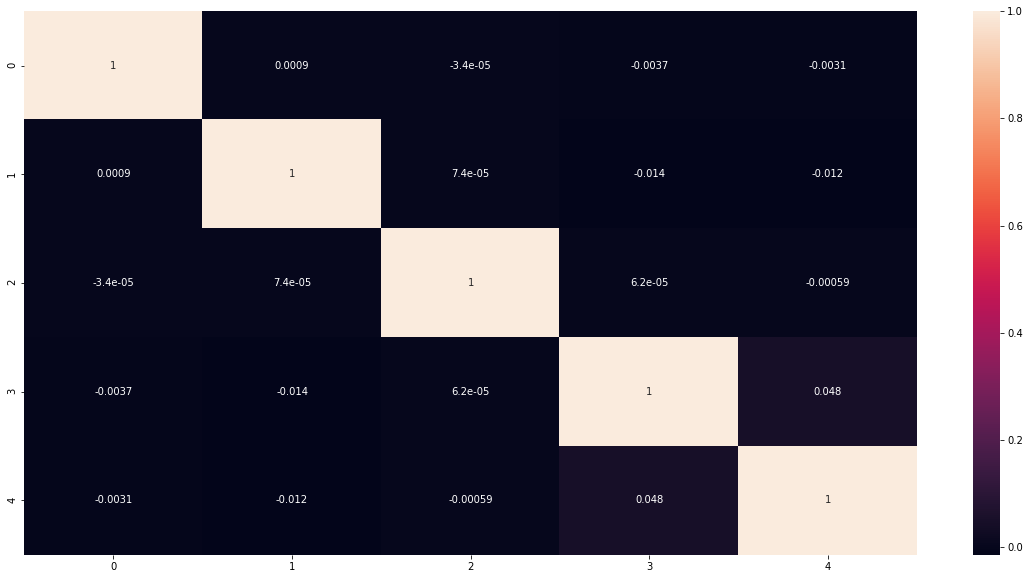

In [28]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [29]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.04750100962092834 , min corr:  -0.013777413350896658


It seems little or no correlation among the variables

### outlier analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x2c9aca35a58>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9ac8cd198>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9aca35438>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9ac8ba4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9ac8ba160>],
 'means': []}

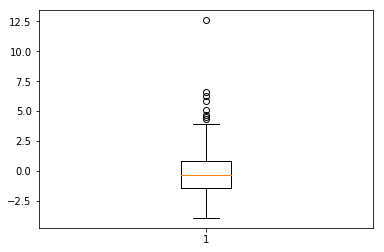

In [30]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
# for PC1
plt.boxplot(pcs_df2.PC1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c9aadc8978>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9aadc8908>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9aadc8278>],
 'medians': [<matplotlib.lines.Line2D at 0x2c9ab0717b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c9aa81df60>],
 'means': []}

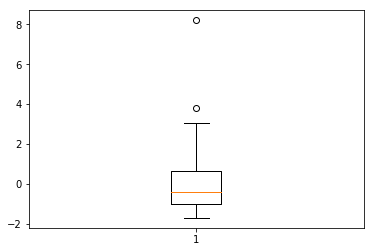

In [31]:
# for PC2
plt.boxplot(pcs_df2.PC2)

#### Since the data is getting lost by treating the outliers therefore we are retaining it and moving forward with it.

In [32]:
# shape of the final principal component dataframe
pcs_df2.shape

(167, 2)

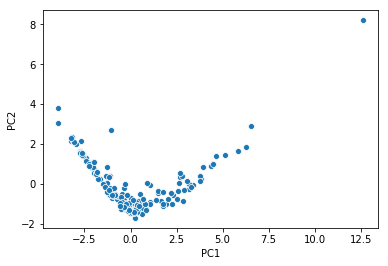

In [33]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

# Step 5: Hopkins Statistics

In [34]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.9444144564696387

#### Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [36]:
# copying pcs_df2 to df_2
df_2 = pcs_df2

# Step 6: K-Means clustering

### importing libraries

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### performing k-means with random clusters say 4

In [38]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 0, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

### finding the optimal number of clusters

### elbow-curve

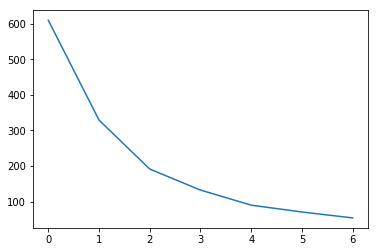

In [40]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_2)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#### From the above curve, 2 clusters seem to be the optimal number of clusters

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [41]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5428022998015879
For n_clusters=3, the silhouette score is 0.5531039376192802
For n_clusters=4, the silhouette score is 0.5608674477746024
For n_clusters=5, the silhouette score is 0.5318171218615901
For n_clusters=6, the silhouette score is 0.496751371780202
For n_clusters=7, the silhouette score is 0.45598244769193036
For n_clusters=8, the silhouette score is 0.46415125331256185


we are taking 2 clusters into account for final model

In [42]:
# final model with k=2
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(df_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [44]:
# final data frame of clusters
df_3=pcs_df2
df_3.index = pd.RangeIndex(len(df_3.index))
df_km = pd.concat([df_3, pd.Series(kmeans.labels_)], axis=1)
df_km.columns = ['PC1', 'PC2','ClusterID']
df_km.head()

,PC1,PC2,ClusterID
0,-2.628433,1.467845,0
1,-0.023712,-1.431231,0
2,-0.457851,-0.677667,0
3,-2.715305,2.168445,0
4,0.647157,-1.023327,0


In [45]:
df_km['ClusterID'].value_counts()

0    130
1     37
Name: ClusterID, dtype: int64

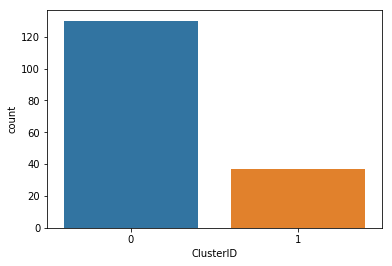

In [46]:
sns.countplot('ClusterID', data = df_km)

#### there are 130 cluster 1 and 37 cluster 0

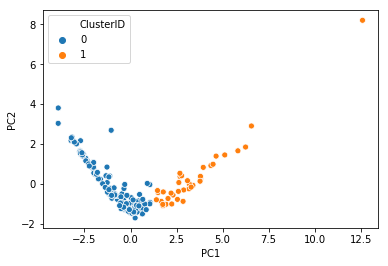

In [47]:
# plot between PC1 and PC2
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=df_km)

### merging original data set with the final clusters

In [48]:
# merging original data set df1 to df_km
country=pd.merge(df1,df_km, left_index=True,right_index=True)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.628433,1.467845,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.023712,-1.431231,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.457851,-0.677667,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.715305,2.168445,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.647157,-1.023327,0


In [49]:
# dropping PC1 and PC2 columns
country = country.drop(['PC1', 'PC2'], 1)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [50]:
country.shape

(167, 11)

### Analysing variables cluster wise

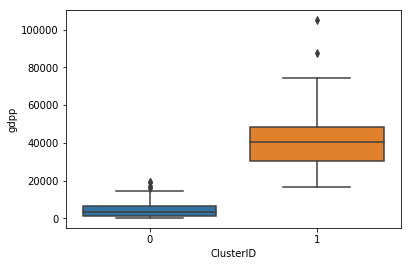

In [51]:
# boxplot of gdpp based on ClusterID
sns.boxplot(x = 'ClusterID', y = 'gdpp', data = country)
plt.show()

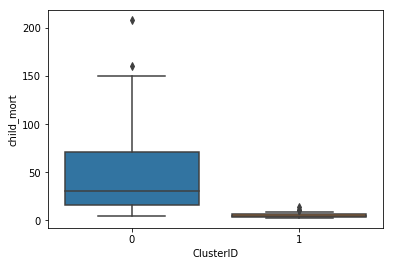

In [52]:
# boxplot of child_mort based on ClusterID
sns.boxplot(x = 'ClusterID', y = 'child_mort', data = country)
plt.show()

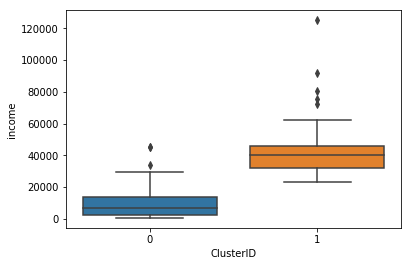

In [53]:
# boxplot of income based on ClusterID
sns.boxplot(x = 'ClusterID', y = 'income', data = country)
plt.show()

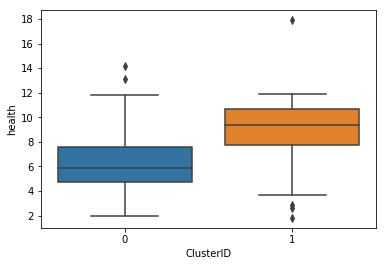

In [54]:
sns.boxplot(x = 'ClusterID', y = 'health', data = country)
plt.show()

### from the above four boxplot we can infer that:
- cluster 1 has low gdpp, high child mortality, low income and lower health than cluster 0
- therefore countries in cluster 1 need more aid than countries in cluster 0 

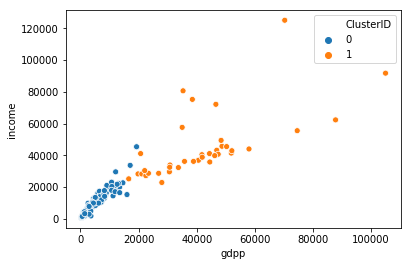

In [55]:
# scatter plot of gdpp and income 
sns.scatterplot(x='gdpp',y='income',hue = 'ClusterID', data=country)

- As the income increases, gdpp is also increasing 
- Country with high income and gdpp are mostly present in cluster 0

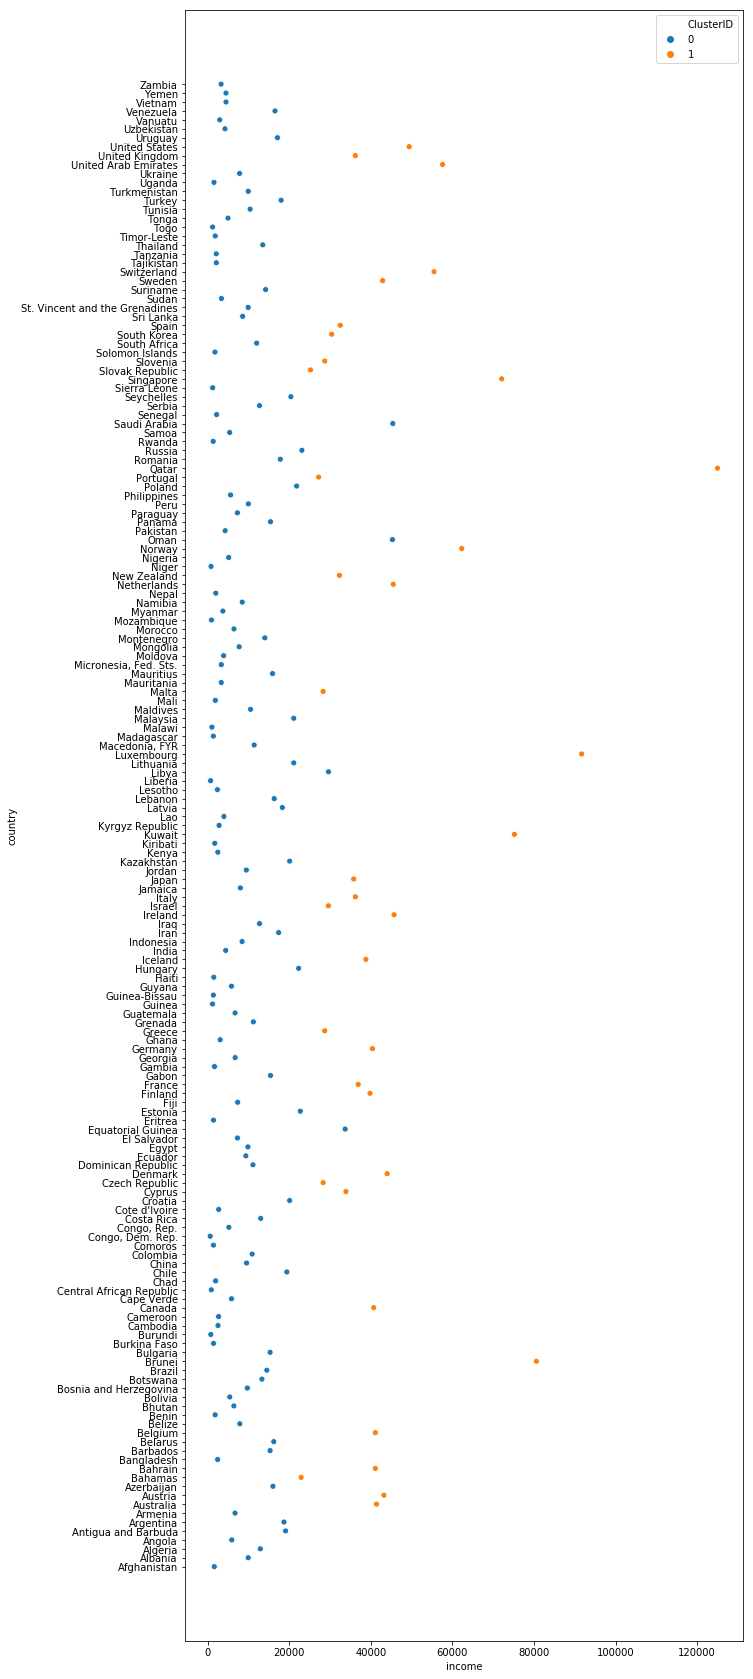

In [56]:
# scatter plot of country with its income 
plt.figure(figsize=(10,30))
sns.scatterplot(x='income',y='country',hue = 'ClusterID', data=country)

# Step 7: Analysing the k-means cluster

In [57]:
# grouping different variables and finding the mean based on their ClusterID  
clu_gdpp = pd.DataFrame(country.groupby(["ClusterID"]).gdpp.mean())
clu_child_mort = pd.DataFrame(country.groupby(["ClusterID"]).child_mort.mean())
clu_income = pd.DataFrame(country.groupby(["ClusterID"]).income.mean())
clu_health = pd.DataFrame(country.groupby(["ClusterID"]).health.mean())
clu_exports = pd.DataFrame(country.groupby(["ClusterID"]).exports.mean())
clu_imports = pd.DataFrame(country.groupby(["ClusterID"]).imports.mean())
clu_inflation = pd.DataFrame(country.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = pd.DataFrame(country.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = pd.DataFrame(country.groupby(["ClusterID"]).total_fer.mean())

In [58]:
# data frame of the mean of the variables grouped by their clusterID
df = pd.concat([pd.Series([0,1]),clu_gdpp,clu_child_mort,clu_income,clu_health,clu_exports,clu_imports,clu_inflation,clu_life_expec,clu_total_fer], axis=1)
df.columns = ["ClusterID","gdpp","child_mort","income","health","exports","imports","inflation","life_expec","total_fer"]
df

,ClusterID,gdpp,child_mort,income,health,exports,imports,inflation,life_expec,total_fer
0,0,4670.876923,47.671538,9200.484615,6.255769,36.273838,45.640507,9.259954,67.880000,3.287308
1,1,42102.702703,5.237838,45056.756757,8.782973,58.097297,51.281081,2.588432,79.956757,1.755676


In [59]:
# developed country 
developed_country = country[country['ClusterID'] == 0]
developed_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [60]:
# under developed country
under_developed_country = country[country['ClusterID'] == 1]
under_developed_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1


### binning the countries 

In [61]:
# binning the country to find the countries who need aid 
final=country[country['gdpp']<=4670.88]
final=final[final['child_mort']>= 47.67]
final=final[final['income']<= 9200.48]

In [62]:
final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,0
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0


In [63]:
final.shape

(45, 11)

#### sorting the data frame to find which country has high child mortality, low health, low income and gdpp, those countries need direct aid from the NGO

In [64]:
# sorting the final data frame based on child motality rate, health, income and gdpp   
final = final.sort_values(['child_mort', 'health', 'income', 'gdpp'], ascending = [False, True, True, True])
final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0


# We can see from the above final dataset the countries which are in direct need of aid are:
- Haiti
- Sierra Leone	
- Chad
- Central African Republic
- Mali

# Step 8: Hierarchical Clustering

In [65]:
# final principal components after PCA   
pcs_df2.head()

,PC1,PC2
0,-2.628433,1.467845
1,-0.023712,-1.431231
2,-0.457851,-0.677667
3,-2.715305,2.168445
4,0.647157,-1.023327


In [66]:
# data frame having original data and clusters they are divided intp after k-means clustering
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


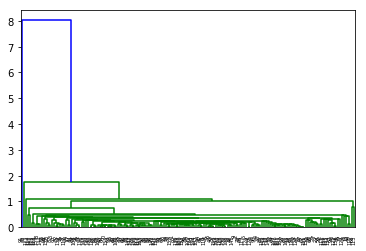

In [67]:
# single linkage
mergings = linkage(pcs_df2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

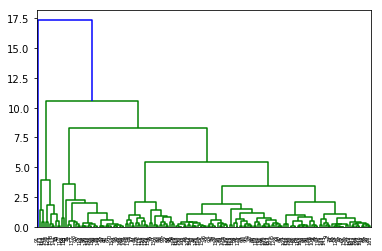

In [68]:
# complete linkage
mergings = linkage(pcs_df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### from the above dendrogram we can take 3 clusters for our final hierarchical clustering 

In [69]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [70]:
# assign cluster labels to country dataframe
country['cluster_labels'] = cluster_labels
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0


In [71]:
# counting the number of cluster_labels
country['cluster_labels'].value_counts()

0    155
1     11
2      1
Name: cluster_labels, dtype: int64

### Analysing variables cluster wise

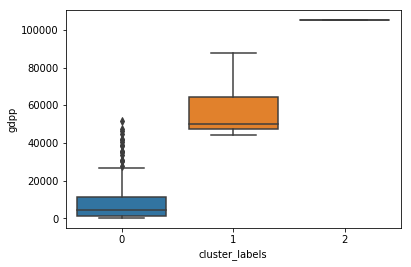

In [72]:
# box plot
sns.boxplot(x = 'cluster_labels', y = 'gdpp', data = country)
plt.show()

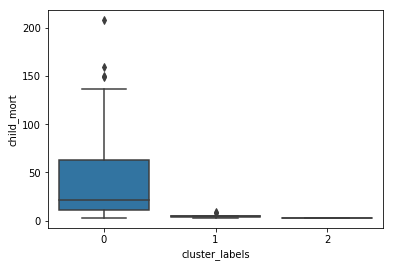

In [73]:
# box plot
sns.boxplot(x = 'cluster_labels', y = 'child_mort', data = country)
plt.show()

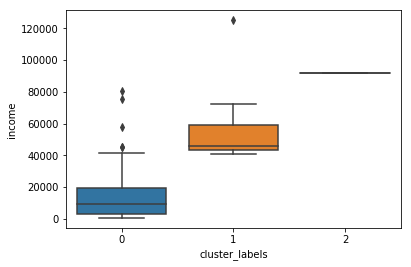

In [74]:
# box plot
sns.boxplot(x = 'cluster_labels', y = 'income', data = country)
plt.show()

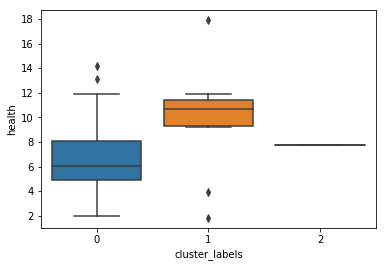

In [75]:
# boxplot
sns.boxplot(x = 'cluster_labels', y = 'health', data = country)
plt.show()

### from the above boxplot we can see that:
- cluster 0 has low gdpp, high child_mort, low income and low health than the rest of the clusters
- therefore countries in cluster 0 need more aid than the rest

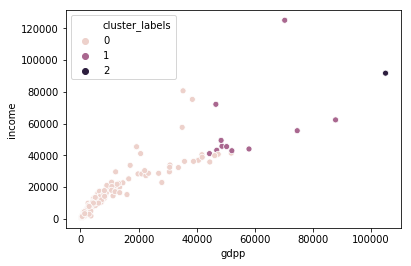

In [76]:
# scatter plot between gdpp and income
sns.scatterplot(x='gdpp',y='income',hue = 'cluster_labels', data=country)

Cluster 0 falls under low income and low gdpp

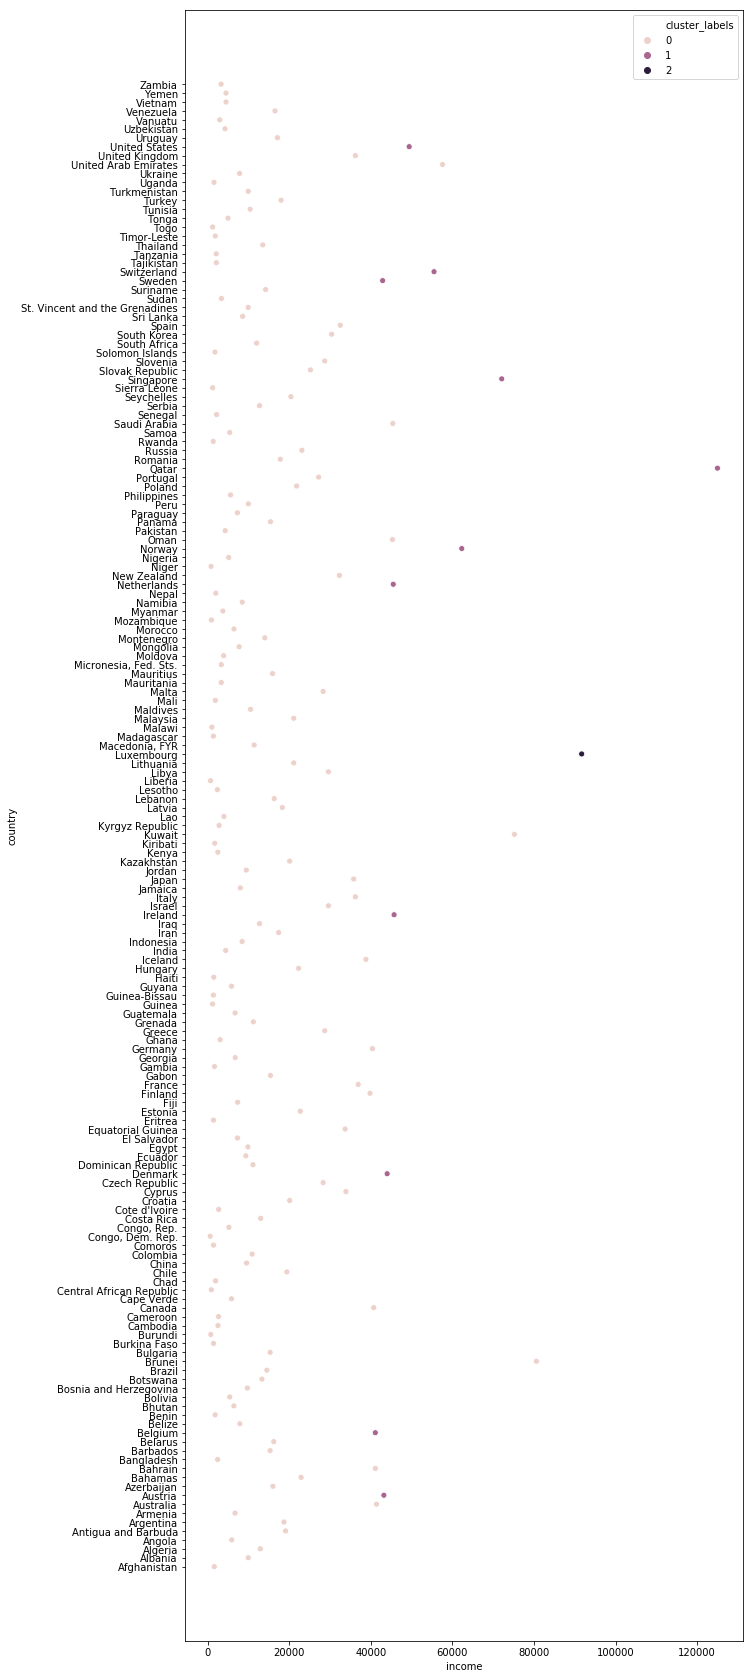

In [77]:
# scatter plot of countries wrt income 
plt.figure(figsize=(10,30))
sns.scatterplot(x='income',y='country',hue = 'cluster_labels', data=country)

# Step 9: Analysing the hierarchical clusters

In [78]:
# grouping different variables and finding the mean based on their cluster_labels  
clu_gdpp = pd.DataFrame(country.groupby(["cluster_labels"]).gdpp.mean())
clu_child_mort = pd.DataFrame(country.groupby(["cluster_labels"]).child_mort.mean())
clu_income = pd.DataFrame(country.groupby(["cluster_labels"]).income.mean())
clu_health = pd.DataFrame(country.groupby(["cluster_labels"]).health.mean())
clu_exports = pd.DataFrame(country.groupby(["cluster_labels"]).exports.mean())
clu_imports = pd.DataFrame(country.groupby(["cluster_labels"]).imports.mean())
clu_inflation = pd.DataFrame(country.groupby(["cluster_labels"]).inflation.mean())
clu_life_expec = pd.DataFrame(country.groupby(["cluster_labels"]).life_expec.mean())
clu_total_fer = pd.DataFrame(country.groupby(["cluster_labels"]).total_fer.mean())

In [79]:
# data frame of the mean of the variables gropued by their cluster_labels
df = pd.concat([pd.Series([0,1,2]),clu_gdpp,clu_child_mort,clu_income,clu_health,clu_exports,clu_imports,clu_inflation,clu_life_expec,clu_total_fer], axis=1)
df.columns = ["cluster_labels","gdpp","child_mort","income","health","exports","imports","inflation","life_expec","total_fer"]
df

,cluster_labels,gdpp,child_mort,income,health,exports,imports,inflation,life_expec,total_fer
0,0,9238.154839,40.883226,13837.180645,6.593419,38.144510,45.395909,8.238277,69.772903,3.039161
1,1,57100.000000,4.672727,56972.727273,9.860909,70.709091,59.300000,1.728455,80.609091,1.782727
2,2,105000.000000,2.800000,91700.000000,7.770000,175.000000,142.000000,3.620000,81.300000,1.630000


### binning the countries

In [80]:
# binning the country to find the countries who need aid 
final=country[country['gdpp']<=9238.15]
final=final[final['child_mort']>= 40.88]
final=final[final['income']<= 13837.18]

In [81]:
# sorting the final data frame based on child motality rate, health, income and gdpp   
final = final.sort_values(['child_mort', 'health', 'income', 'gdpp'], ascending = [False, True, True, True])
final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0,0


# We can see from the above final dataset the countries which are in direct need of aid are:
- Haiti
- Sierra Leone	
- Chad
- Central African Republic
- Mali

which is same as k-means clustering